In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# mock data
data = {
    'distance_to_service': np.random.rand(100) * 10,
    'price': np.random.rand(100) * 100,
    'business_rating': np.random.randint(1, 6, size=100),
    'user_rating': np.random.randint(1, 6, size=100),
    'user_preference': np.random.choice(['high', 'medium', 'low'], size=100),
    'service_category': np.random.choice(['food', 'cleaning', 'repair', 'beauty'], size=100),
    'customer_segment': np.random.choice(['premium', 'budget', 'mainstream'], size=100)
}

df = pd.DataFrame(data)
df.head()

,distance_to_service,price,business_rating,user_rating,user_preference,service_category,customer_segment
0,4.051230,37.218805,4,5,low,food,premium
1,9.890590,84.811247,5,5,high,food,premium
2,3.455516,13.487476,5,5,low,food,budget
3,6.671165,37.671559,4,2,high,cleaning,mainstream
4,4.763938,52.911729,3,5,high,beauty,mainstream


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['user_preference', 'service_category', 'customer_segment']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['distance_to_service', 'price', 'business_rating', 'user_rating']] = scaler.fit_transform(
    df[['distance_to_service', 'price', 'business_rating', 'user_rating']])

df.head()

,distance_to_service,price,business_rating,user_rating,user_preference,service_category,customer_segment
0,-0.365764,-0.407470,0.482435,1.394065,1,2,2
1,1.671482,1.294626,1.161922,1.394065,0,2,2
2,-0.573598,-1.256198,1.161922,1.394065,1,2,0
3,0.548283,-0.391278,0.482435,-0.676329,0,1,1
4,-0.117113,0.153772,-0.197051,1.394065,0,0,1


In [ ]:
# Split data
X = df[['distance_to_service', 'price', 'business_rating', 'user_rating', 'user_preference', 'service_category']]
y = df['customer_segment']
model = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X)

def recommend_services(user_data):
    distances, indices = model.kneighbors(user_data)
    return indices

# Mock user data for recommendation
user_data = np.array([
    [
        0.5, 0.5, 0.5, 0.5,
        label_encoders['user_preference'].transform(['medium'])[0],
        label_encoders['service_category'].transform(['food'])[0]
    ]
])
recommendations = recommend_services(user_data)

print("Recommended Services/Products:")
df.iloc[recommendations[0]]

Recommended Services/Products:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,distance_to_service,price,business_rating,user_rating,user_preference,service_category,customer_segment
97,1.631492,0.313130,0.482435,0.703934,2,2,1
23,0.379523,0.296261,1.161922,0.013803,2,3,2
30,0.913262,0.547255,1.161922,0.013803,1,2,1
62,0.499734,-0.182886,0.482435,1.394065,2,3,2
90,1.661417,0.915847,0.482435,0.703934,2,1,0


In [ ]:
# KMeans clustering for customer segmentation
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign cluster labels to customers
df['cluster'] = kmeans.labels_

print("Customer Segmentation:")
df.head()

Customer Segmentation:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,distance_to_service,price,business_rating,user_rating,user_preference,service_category,customer_segment,cluster
0,-0.365764,-0.407470,0.482435,1.394065,1,2,2,1
1,1.671482,1.294626,1.161922,1.394065,0,2,2,1
2,-0.573598,-1.256198,1.161922,1.394065,1,2,0,1
3,0.548283,-0.391278,0.482435,-0.676329,0,1,1,2
4,-0.117113,0.153772,-0.197051,1.394065,0,0,1,0


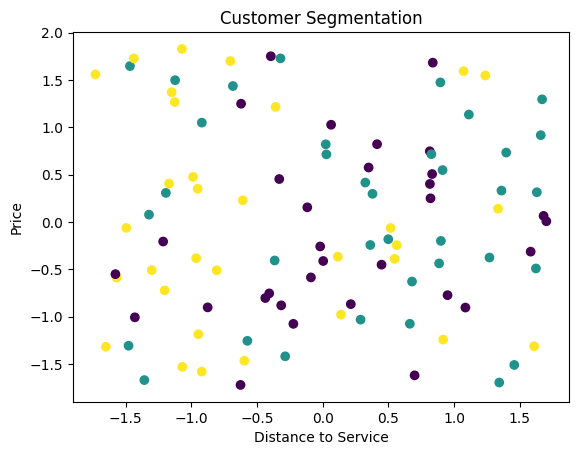

In [ ]:
# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df['distance_to_service'], df['price'], c=df['cluster'])
plt.xlabel('Distance to Service')
plt.ylabel('Price')
plt.title('Customer Segmentation')
plt.show()

**Summary**
The presented code is a good example of a basic recommendation system by the use of the Nearest Neighbors algorithm and customer segmentation through KMeans clustering technique. Initially, the data is appropriately transformed by transforming the categorical variables and scaling the numerical features. The recommendation system offers the user the option to have tailor-made services, or to buy them according to the preferences that he or she made or according to other factors. On one hand, the dusting algorithm finds false positives and removes problems of overexposure caused by spam-related lists.